<h1 align="center">Linear Regression</h1>

## Import libraries

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## The Linear Regression Algorithm

In [113]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000) -> None:
        self.lr = learning_rate
        self.n_iters = n_iters

        self.weights = None
        self.bias = None

    def fit(self, X, y) -> None:
        # Init pqrameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            # Derivative of the weights
            # dw/dx = 1/n * X^T * (y_pred - y)
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))

            # Derivative of the bias
            # db/dx = 1/n * sum(y_pred - y)
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X) -> np.ndarray:
        return np.dot(X, self.weights) + self.bias

### And Gate Prediction

In [114]:
ag = pd.read_csv("data/and-gate.csv")

In [115]:
lr = LinearRegression(learning_rate=0.01, n_iters=1000)

In [116]:
lr.fit(ag[["B", "A"]].values, ag["Y"].values)

In [117]:
y_pred = np.round(lr.predict(ag[["B", "A"]].values))

In [118]:
pd.DataFrame({"B": ag["B"], "A": ag["A"], "Y": ag["Y"], "Y_pred": y_pred})

,B,A,Y,Y_pred
0,0,0,0,-0.0
1,0,1,0,0.0
2,1,0,0,0.0
3,1,1,1,1.0


## Products Prediction

### Training the model based on `Width` and `Height`


In [119]:
type_mappings = {"Chair": 0, "Table": 1, "Bed": 2}

In [120]:
prod_train = pd.read_csv("data/prod-train.csv")

In [121]:
# Feature selection
features = ["Width", "Height"]

# Slipt data into X and Y
X = prod_train[features].values
Y = prod_train["Type"].map(type_mappings).values

In [122]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

lr=0.01: mse=0.0
lr=0.02: mse=0.0
lr=0.001: mse=1.0
lr=0.002: mse=0.5


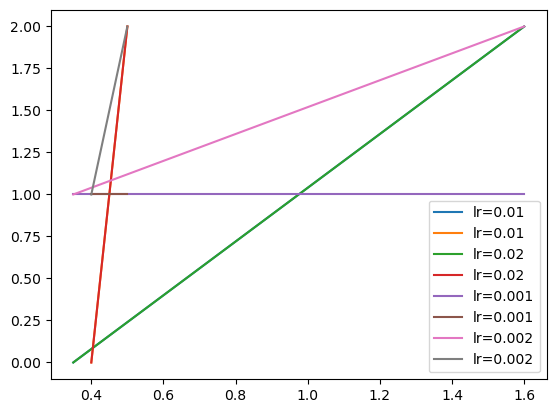

In [123]:
for lr in [0.01, 0.02, 0.001, 0.002]:
    l = LinearRegression(learning_rate=lr, n_iters=1000)
    l.fit(X_train, y_train)

    y_pred = np.round(l.predict(X_test))

    print(f"lr={lr}: mse={mean_squared_error(y_test, y_pred)}")
    plt.plot(X_test, y_pred, label=f"lr={lr}")

plt.legend()
plt.show()

### Testing the model

In [124]:
prod_test = pd.read_csv("data/prod-test.csv")

In [125]:
lr = LinearRegression(learning_rate=0.01, n_iters=1000)

In [126]:
lr.fit(prod_train[features].values, prod_train["Type"].map(type_mappings).values)

In [127]:
y_pred = np.round(lr.predict(prod_test[features].values))

In [128]:
pd.DataFrame(
    {"Width": prod_test["Width"], "Height": prod_test["Height"], "Type_pred": y_pred}
)

,Width,Height,Type_pred
0,0.35,0.35,0.0
1,0.85,0.70,1.0
2,1.40,0.45,2.0
